In [1]:
# 加载必要的数据包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   

In [2]:
df = pd.read_csv('heart.csv')
df

FileNotFoundError: ignored

各列具体含义：
*  年龄：年龄
*  性别：（1 = 男性；0 = 女性）
*  cp：胸痛类型（1：典型心绞痛，2：非典型心绞痛，3：非心绞痛，4：无症状）
*  trestbps：静息血压（入院时以 mm Hg 为单位）
*  chol：以mg/dl计的血清胆固醇
*  fbs：（空腹血糖 > 120 mg/dl）（1：真；0：假）
*  restecg：静息心电图结果（0：正常，1：有异常，2 = 显示心室肥大）
*  thalach：达到最大心率
*  exang：运动诱发的心绞痛（1：是，0：否）
*  oldpeak：相对于休息，运动引起的 ST 压低
* slope：峰值运动ST段的斜率（1：向上倾斜，2：平坦，3：向下倾斜）
*  ca：通过荧光检查着色的主要血管 (0-3) 的数量
*  thal：地中海贫血（一种血液疾病）（3 = 正常；6 = 固定缺陷；7 = 可逆缺陷）
*  target：心脏病（0：否，1：是）


In [ ]:
# 改下名字让这些列更易于理解
df.columns = ['age', 'isMale', 'cp', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
              'maximum_heart_rate', 'exercise_induced_angina', 'old_peak', 'slope', 'major_vessels', 
              'thal', 'heart_disease']
df 

,age,isMale,cp,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,old_peak,slope,major_vessels,thal,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().values.any()
# 全为false表示均不缺失值

False

In [ ]:
# 展示一些数据的基本信息
df.describe()

,age,isMale,cp,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,old_peak,slope,major_vessels,thal,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**离散变量**

In [ ]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.columns
df = df.drop(columns = ['cp', 'thal', 'thal_0', 'slope'])
# renaming categorical columns
df = df.rename(columns={
  'cp_0':'typical_angina_pain',
  'cp_1':'atypical_angina_pain',
  'cp_2':'non-anginal_pain',
  'cp_3':'asymptomatic_pain',
  'slope_0':'upsloping_st', 'slope_1':'flat_st', 'slope_2':'downsloping_st',
  'thal_1': 'thalassemia_normal', 'thal_2': 'thalassemia_fixed', 'thal_3': 'thalassemia_reversable'})
df

,age,isMale,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,old_peak,major_vessels,heart_disease,typical_angina_pain,atypical_angina_pain,non-anginal_pain,asymptomatic_pain,thalassemia_normal,thalassemia_fixed,thalassemia_reversable,upsloping_st,flat_st,downsloping_st
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,0,1,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,0,0,0,0,1,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,0,1,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,0,1,0,0,0,0,0,1,0,1,0


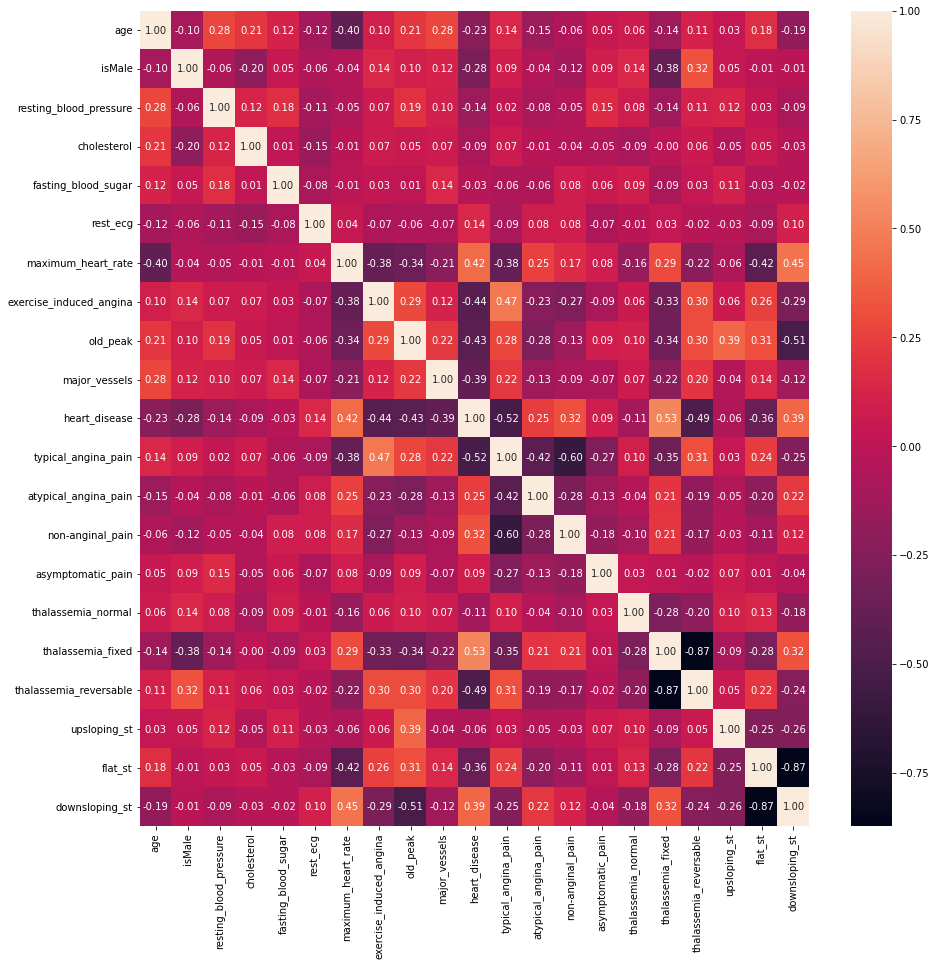

In [ ]:
plt.figure(figsize=(15,15))
matrix = df.corr()
mask1 = np.triu(np.ones_like(matrix, dtype=bool))
mask2 = np.abs(matrix) <= 0.5
mask  = mask1 | mask2
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

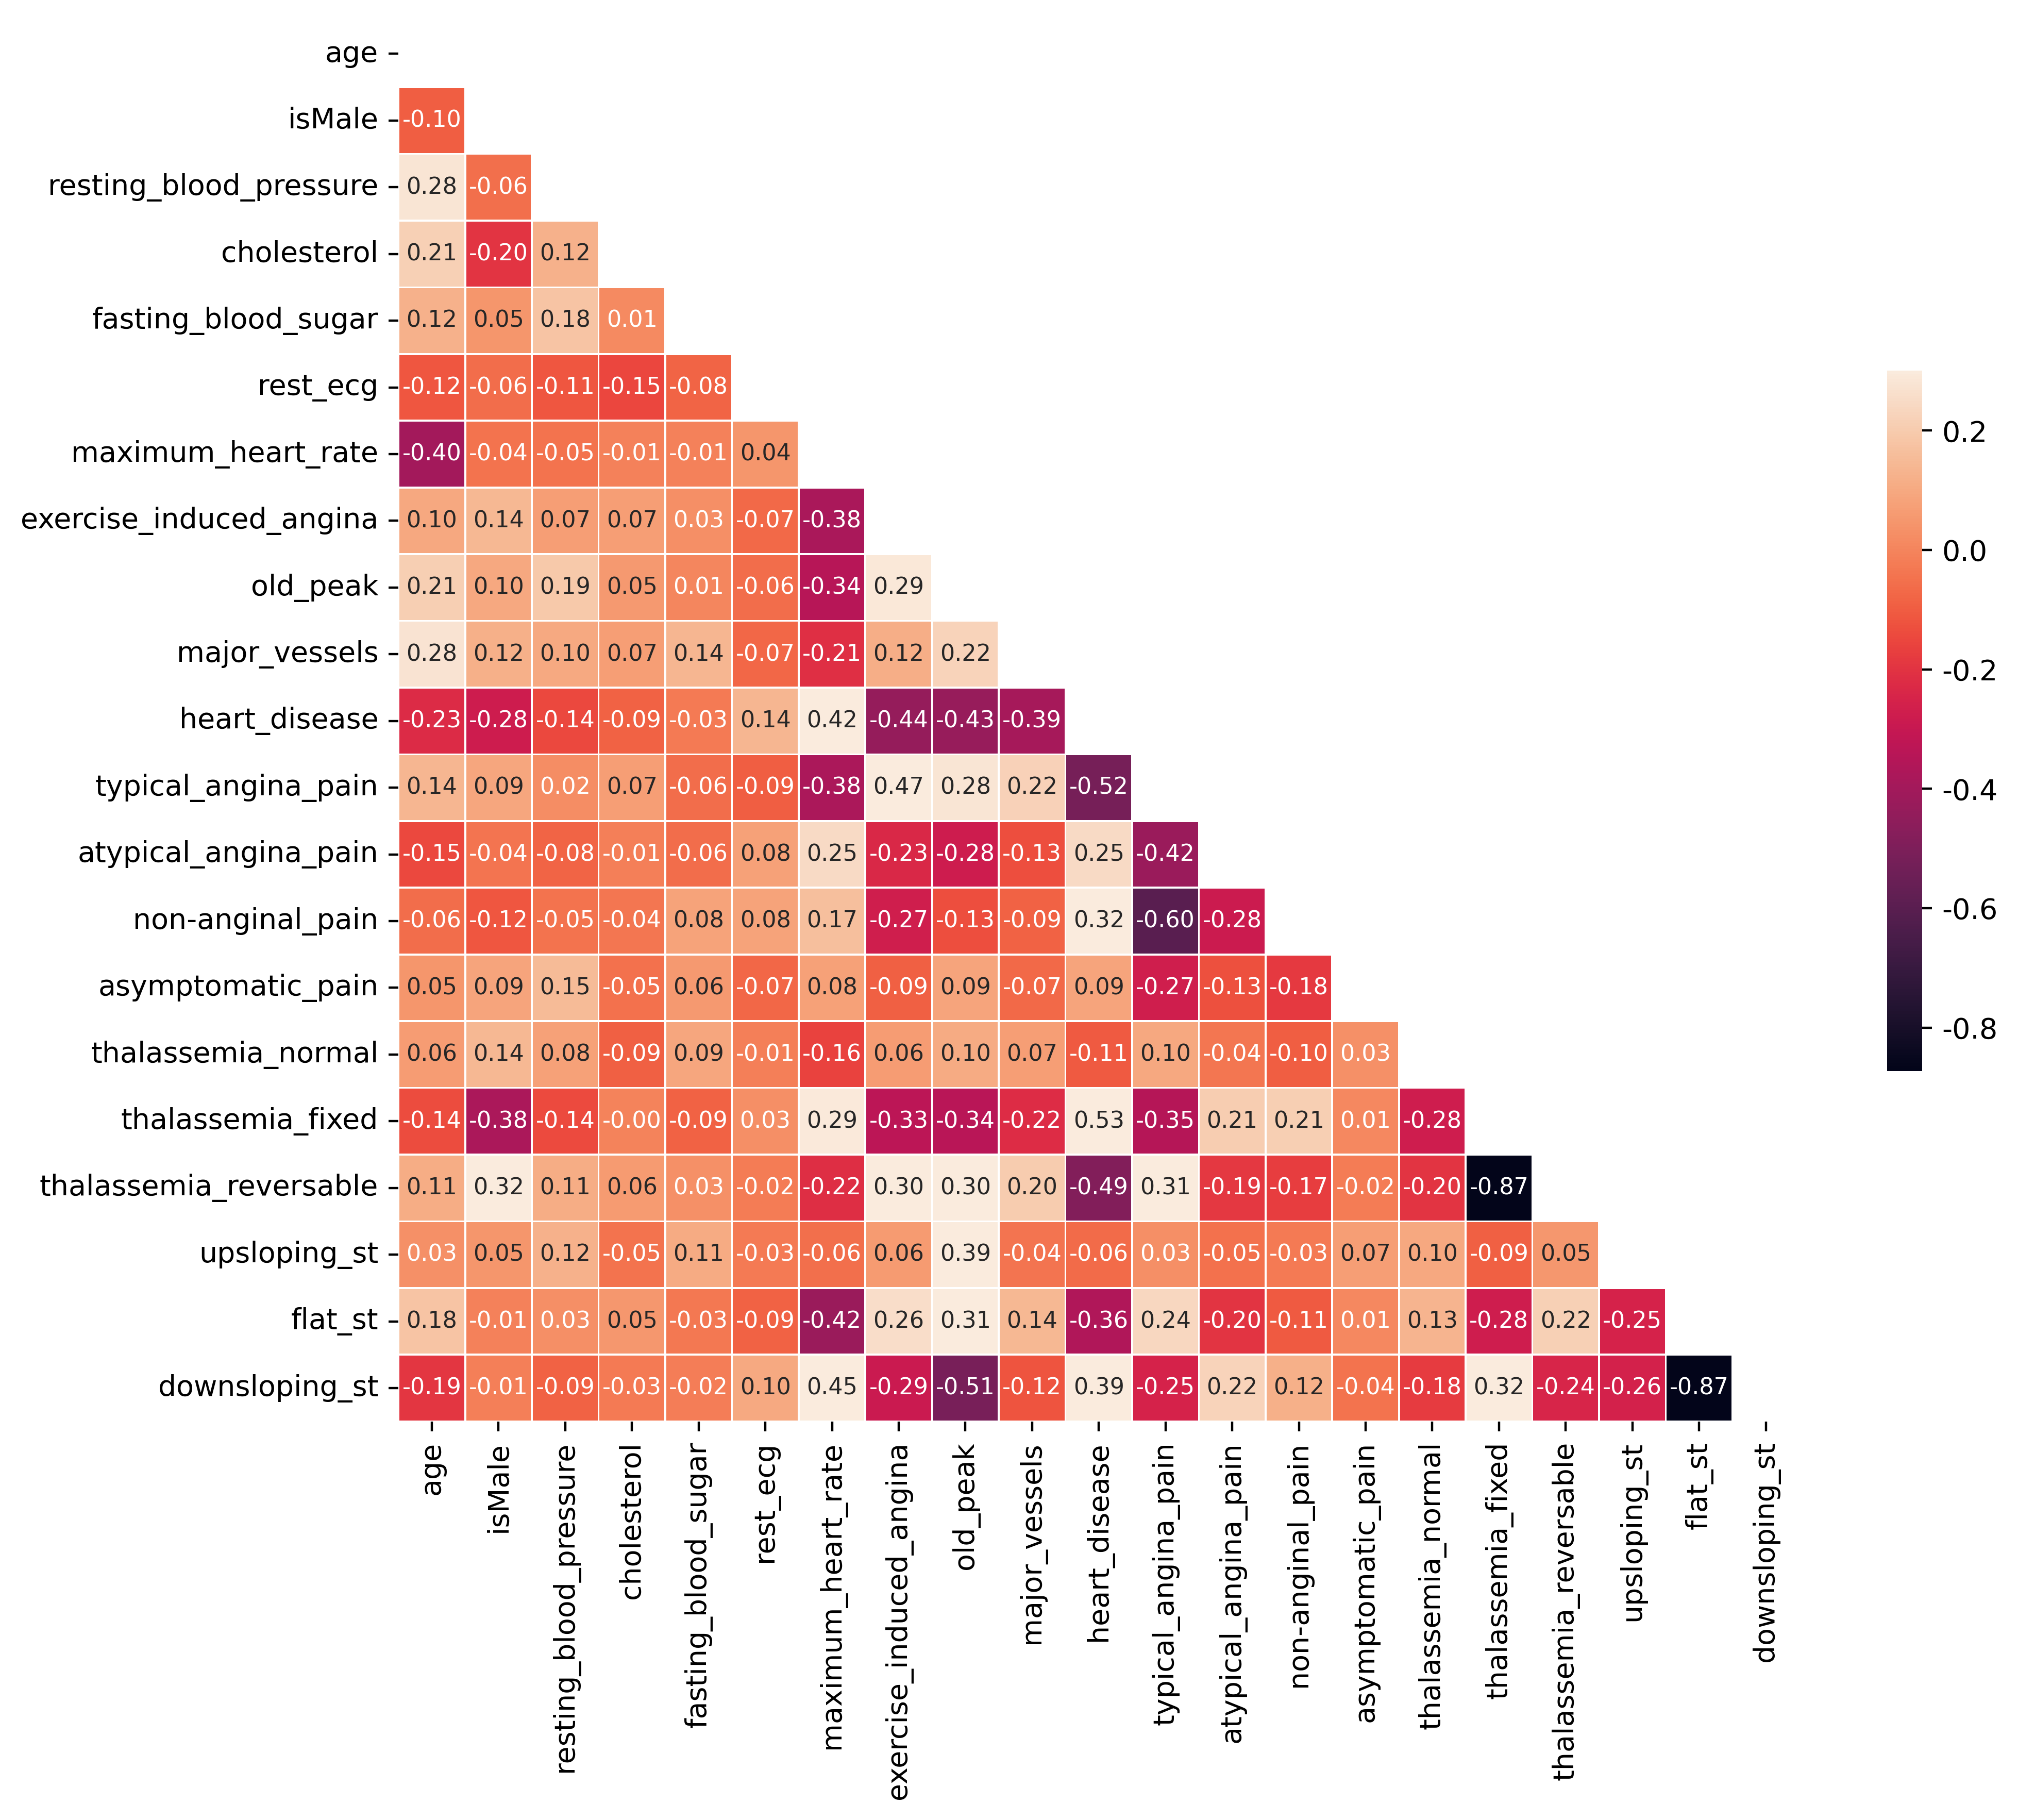

In [ ]:
plt.figure(figsize=(11, 9),dpi=400)
sns.heatmap(
    df.corr(),            
    vmax=0.3,             
    #  cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,            
    annot=True,            
    fmt=".2f",            
    annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},            
    mask=np.triu(np.ones_like(df.corr(),dtype=np.bool)),#显示对脚线下面部分图            
    square=True, linewidths=.5,#每个方格外框显示，外框宽度设置           
    cbar_kws={"shrink": .5}           )
plt.show()

In [ ]:
# ignoring divide error and pair plotting
with np.errstate(divide='ignore',invalid='ignore'):
    sns.pairplot(df, hue="heart_disease", palette="husl")
plt.show()

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


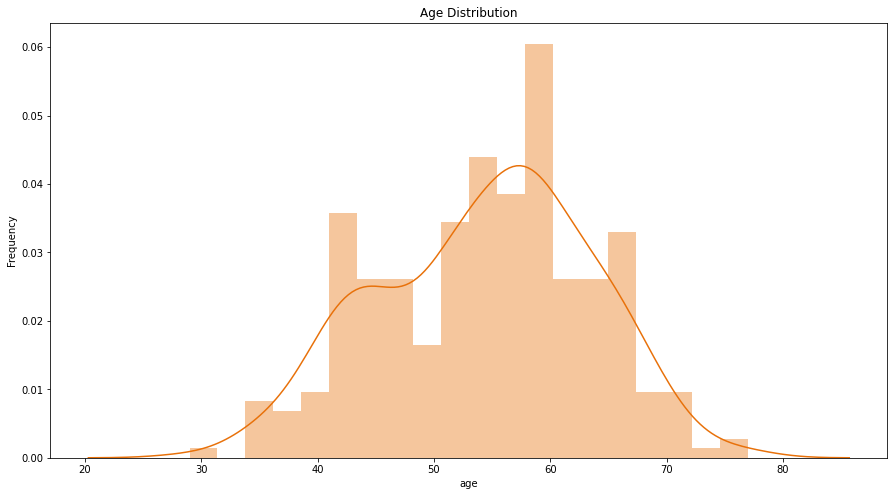

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Age Distribution')
plt.ylabel('Frequency')
plt.xlabel('Age')
sns.distplot(df['age'],color='#E8710A',bins=20)

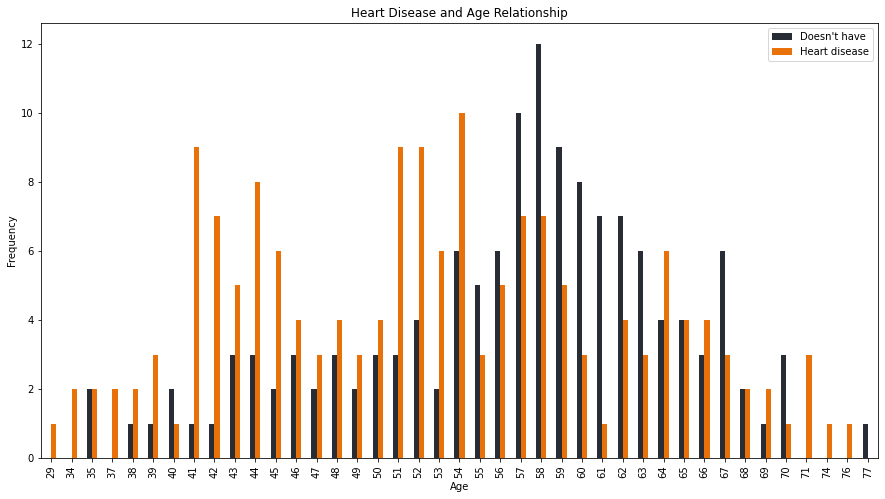

In [ ]:
pd.crosstab(df.age,df.heart_disease).plot(kind="bar",figsize=(15,8), color=['#282C34','#E8710A' ])
plt.title('Heart Disease and Age Relationship')
plt.legend(["Doesn't have", "Heart disease"])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

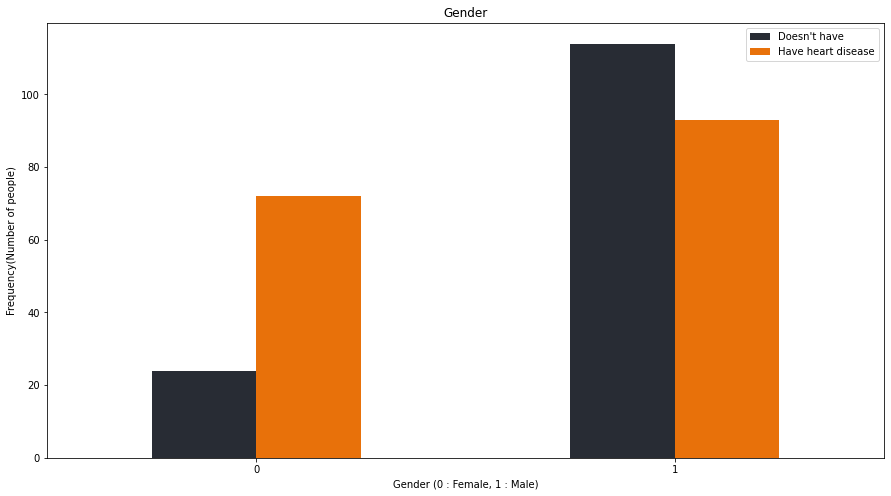

In [ ]:
pd.crosstab(df.isMale,df.heart_disease).plot(kind="bar",figsize=(15,8), color=['#282C34','#E8710A' ])
plt.title('Gender')
plt.xlabel('Gender (0 : Female, 1 : Male)')
plt.xticks(rotation=0)
plt.legend(["Doesn't have", "Have heart disease"])
plt.ylabel('Frequency(Number of people)')
plt.show()

In [ ]:
x_data = df.drop(['heart_disease'], axis=1)

# normalization
X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
y = df['heart_disease']

# 对x进行处理和规范化

In [ ]:
# 模型的选择
# SVM：支持向量机算法的目标是在空间中找到一个对数据点进行明确分类的超平面。
# 为了分离两类数据点，可以选择许多可能的超平面。 
# 我们的目标是找到一个具有最大边距的平面，即两个类的数据点之间的最大距离。 
# 最大化边缘距离提供了一些强化，以便可以更有信心地对未来的数据点进行分类。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# 分离测试集和训练集

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score

svc=SVC(kernel= 'rbf', gamma = 'scale' ,random_state=42)
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)

# storing recall_score for later comparision
svm_recall = round(recall_score(y_test,svm_pred,average='weighted'),3)

print (classification_report(y_test, svm_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
acc = accuracy_score(y_test, svm_pred)
print ("Accuracy: %.3f" % acc)

              precision    recall  f1-score   support

           0      0.885     0.852     0.868        27
           1      0.886     0.912     0.899        34

    accuracy                          0.885        61
   macro avg      0.885     0.882     0.883        61
weighted avg      0.885     0.885     0.885        61

Accuracy: 0.885


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


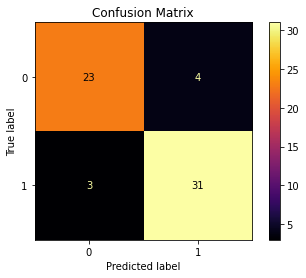

In [ ]:
# 使用混淆矩阵 分析分类效果
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(svc, X_test, y_test,
                             cmap=plt.cm.inferno)
disp.ax_.set_title("Confusion Matrix")
plt.show()

gamma = 0.01  accuracy = 0.87   AUC = 0.919
gamma = 0.1  accuracy = 0.87   AUC = 0.927
gamma = 0.2  accuracy = 0.87   AUC = 0.937
gamma = 1  accuracy = 0.84   AUC = 0.920
gamma = scale  accuracy = 0.89   AUC = 0.937
gamma = auto  accuracy = 0.87   AUC = 0.920


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


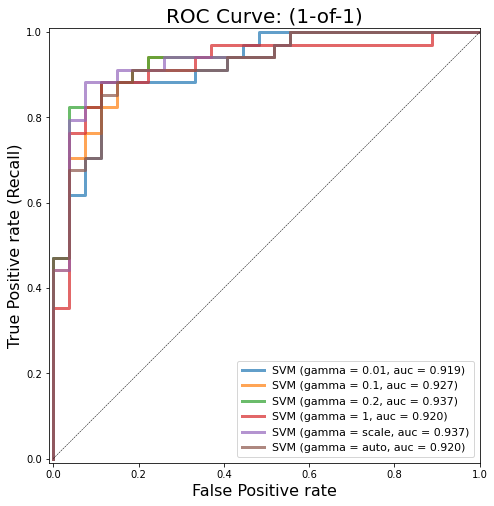

In [ ]:
from matplotlib import cm
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (15,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1, 'scale', 'auto']:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {}  accuracy = {:.2f}   AUC = {:.3f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {}, auc = {:0.3f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive rate', fontsize=16)
plt.ylabel('True Positive rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC Curve: (1-of-1)', fontsize=20)
plt.axes().set_aspect('equal')

plt.show()

**K近邻（KNN）方法**

KNN 算法假设相似的事物存在于附近。 换句话说，相似的事物彼此接近。 KNN 通过计算图上点之间的距离来捕捉相似性的概念。

In [ ]:
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('TP rate',fontsize=15)
    plt.xlabel('FP rate',fontsize=15)
    plt.title('ROC',fontsize=17)
    plt.show()

              precision    recall  f1-score   support

           0      0.857     0.889     0.873        27
           1      0.909     0.882     0.896        34

    accuracy                          0.885        61
   macro avg      0.883     0.886     0.884        61
weighted avg      0.886     0.885     0.885        61

Accuracy: 0.885


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


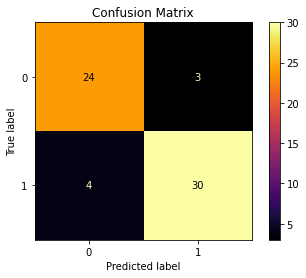

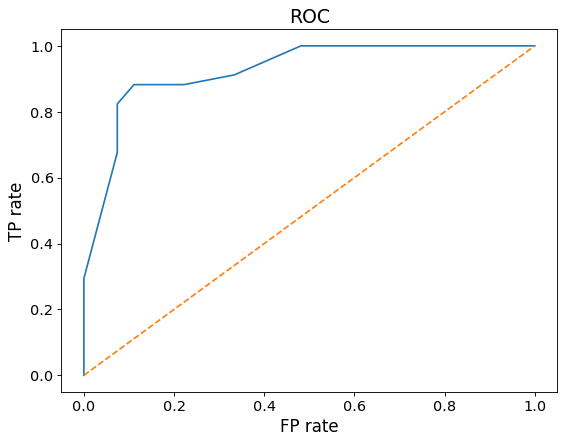

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8,metric='minkowski')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
# storing recall_score for later comparision
knn_recall = round(recall_score(y_test,knn_pred,average='weighted'),3)
print (classification_report(y_test, knn_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
print ("Accuracy: %.3f" % accuracy_score(y_test, knn_pred))
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.inferno)
disp.ax_.set_title("Confusion Matrix")
plt.show()
knn_clf = KNeighborsClassifier()
y_probabilities = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fprs2,tprs2,thresholds2 = roc_curve(y_test,y_probabilities)
# 此处调用前面的绘制函数
plot_roc_curve(fprs2,tprs2)


**Decision** **Trees**


A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

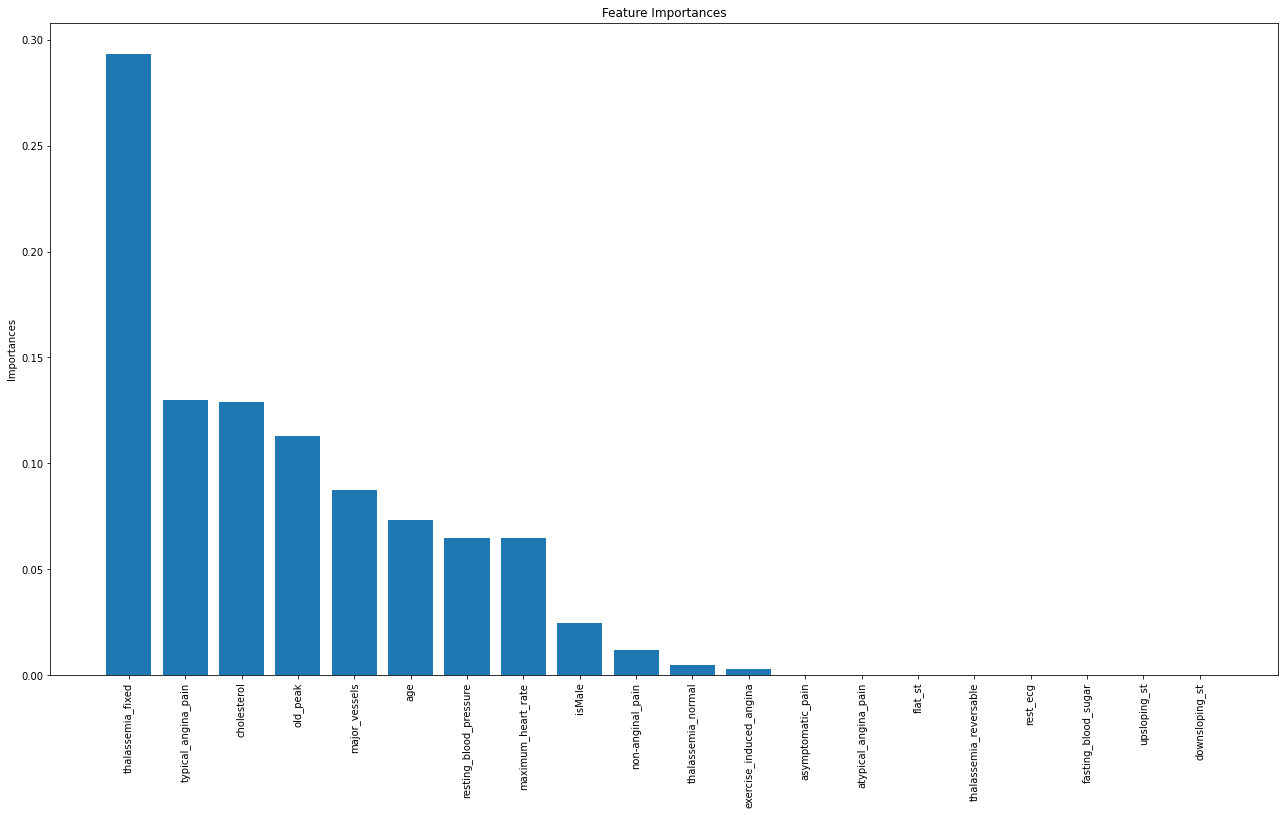

              precision    recall  f1-score   support

           0      0.733     0.815     0.772        27
           1      0.839     0.765     0.800        34

    accuracy                          0.787        61
   macro avg      0.786     0.790     0.786        61
weighted avg      0.792     0.787     0.788        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


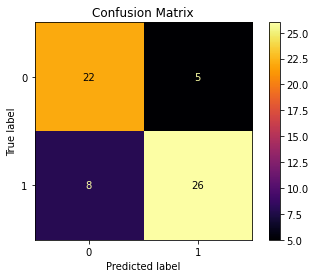

In [ ]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# predict the target on the test dataset
tree_predict_test = tree.predict(X_test)

tree_recall = round(recall_score(y_test, tree_predict_test, average='weighted'),3)

# Feature Importances

# Calculate feature importances
importances = tree.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize = (22,12))
# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# Create plot title
plt.title("Feature Importances")
plt.ylabel('Importances')
# Show plot
plt.show()
print (classification_report(y_test, tree_predict_test, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))

# 混淆矩阵
disp = plot_confusion_matrix(tree, X_test, y_test,cmap=plt.cm.inferno)
disp.ax_.set_title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0      0.733     0.815     0.772        27
           1      0.839     0.765     0.800        34

    accuracy                          0.787        61
   macro avg      0.786     0.790     0.786        61
weighted avg      0.792     0.787     0.788        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


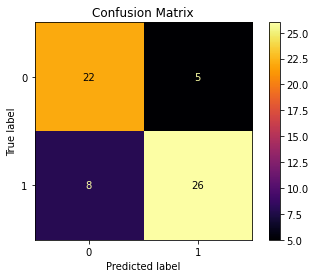

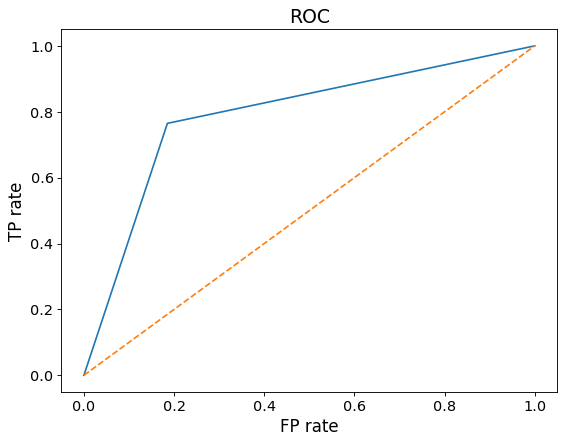

In [ ]:
y_probabilities = tree.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fprs3,tprs3,thresholds3 = roc_curve(y_test,y_probabilities)
# 此处调用前面的绘制函数
plot_roc_curve(fprs3,tprs3)


方法对比

In [ ]:
recall_dict = {'SVM':svm_recall,
               'KNN': knn_recall,
               'Decision Trees': tree_recall,
               }
pr_df = pd.DataFrame(recall_dict,index=['Recall Score'])
d = dict(selector="th", props=[('text-align', 'center')])
pr_df.style.set_properties(**{'width':'10em', 'text-align':'center'}).set_table_styles([d]) 
pr_df


,SVM,KNN,Decision Trees
Recall Score,0.885,0.885,0.787


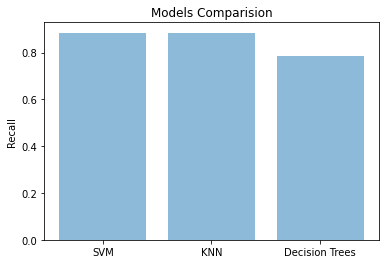

In [ ]:
y_pos = np.arange(len(recall_dict))
plt.bar(y_pos, recall_dict.values(), align='center', alpha=0.5)
plt.xticks(y_pos, recall_dict.keys())
plt.ylabel('Recall')
plt.title('Models Comparision')
plt.show()